<a href="https://colab.research.google.com/github/luccidomingues/NBA-Web-Scraping/blob/main/Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using pandas read_html to Web Scrape Data

In this notebook, I will be showing you how to easily web scrape data using pandas read_html() function for your data science project. We will be web scraping NBA player stats data and perform a quick data exploration.

URL to the webpage "2018-19 NBA Player Stats: Per Game"

Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [2]:
# The Building Blocks
year = '2019'

str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the URL + year strings together
url = str.format(year)
url


'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

In [3]:

years = [2015,2016,2017,2018,2019]
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = str.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


In [4]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

url_t = 'https://www.basketball-reference.com/leagues/NBA_2019_totals.html'

Read HTML webpage into pandas

In [5]:
import pandas as pd

Using pd.read_html() function to read HTML webpage

In [6]:
df = pd.read_html(url, header = 0)
df

[      Rk        Player Pos Age   Tm   G  GS  ...  TRB  AST  STL  BLK  TOV   PF   PTS
 0      1  Álex Abrines  SG  25  OKC  31   2  ...  1.5  0.6  0.5  0.2  0.5  1.7   5.3
 1      2    Quincy Acy  PF  28  PHO  10   0  ...  2.5  0.8  0.1  0.4  0.4  2.4   1.7
 2      3  Jaylen Adams  PG  22  ATL  34   1  ...  1.8  1.9  0.4  0.1  0.8  1.3   3.2
 3      4  Steven Adams   C  25  OKC  80  80  ...  9.5  1.6  1.5  1.0  1.7  2.6  13.9
 4      5   Bam Adebayo   C  21  MIA  82  28  ...  7.3  2.2  0.9  0.8  1.5  2.5   8.9
 ..   ...           ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...
 729  528  Tyler Zeller   C  29  MEM   4   1  ...  4.5  0.8  0.3  0.8  1.0  4.0  11.5
 730  529    Ante Žižić   C  22  CLE  59  25  ...  5.4  0.9  0.2  0.4  1.0  1.9   7.8
 731  530   Ivica Zubac   C  21  TOT  59  37  ...  6.1  1.1  0.2  0.9  1.2  2.3   8.9
 732  530   Ivica Zubac   C  21  LAL  33  12  ...  4.9  0.8  0.1  0.8  1.0  2.2   8.5
 733  530   Ivica Zubac   C  21  LAC  26  25  ...  7.7

How many tables are there in the webpage?

In [7]:
len(df)

1

Select the first table¶

In [8]:

df[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,NaN,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,NaN,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,NaN,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,NaN,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [9]:
df2019 = df[0]


Data cleaning
We can see that the table header is presented multiple times in several rows.

In [10]:
df2019[df2019.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
49,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
70,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
97,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
132,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
161,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
186,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
217,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
244,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
269,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [11]:
len(df2019[df2019.Age == 'Age'])

26

In [12]:
df = df2019.drop(df2019[df2019.Age == 'Age'].index)

In [13]:
df.shape

(708, 30)

In [14]:
# df[df.Player == 'Bam Adebayo']

df[df.Player == 'Kemba Walker']

# df[df.Tm == 'LAL']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
690,497,Kemba Walker,PG,28,CHO,82,82,34.9,8.9,20.5,.434,3.2,8.9,.356,5.7,11.6,.494,.511,4.6,5.5,.844,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6


In [15]:
df_t = pd.read_html(url_t, header = 0)

df_t

[      Rk        Player Pos Age   Tm   G  GS  ...  TRB  AST  STL BLK  TOV   PF   PTS
 0      1  Álex Abrines  SG  25  OKC  31   2  ...   48   20   17   6   14   53   165
 1      2    Quincy Acy  PF  28  PHO  10   0  ...   25    8    1   4    4   24    17
 2      3  Jaylen Adams  PG  22  ATL  34   1  ...   60   65   14   5   28   45   108
 3      4  Steven Adams   C  25  OKC  80  80  ...  760  124  117  76  135  204  1108
 4      5   Bam Adebayo   C  21  MIA  82  28  ...  597  184   71  65  121  203   729
 ..   ...           ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ..  ...  ...   ...
 729  528  Tyler Zeller   C  29  MEM   4   1  ...   18    3    1   3    4   16    46
 730  529    Ante Žižić   C  22  CLE  59  25  ...  320   53   13  22   61  113   459
 731  530   Ivica Zubac   C  21  TOT  59  37  ...  362   63   14  51   70  137   525
 732  530   Ivica Zubac   C  21  LAL  33  12  ...  162   25    4  27   33   73   281
 733  530   Ivica Zubac   C  21  LAC  26  25  ...  200   38   10 

In [16]:
df_t[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,588,56,157,.357,41,127,.323,15,30,.500,.487,12,13,.923,5,43,48,20,17,6,14,53,165
1,2,Quincy Acy,PF,28,PHO,10,0,123,4,18,.222,2,15,.133,2,3,.667,.278,7,10,.700,3,22,25,8,1,4,4,24,17
2,3,Jaylen Adams,PG,22,ATL,34,1,428,38,110,.345,25,74,.338,13,36,.361,.459,7,9,.778,11,49,60,65,14,5,28,45,108
3,4,Steven Adams,C,25,OKC,80,80,2669,481,809,.595,0,2,.000,481,807,.596,.595,146,292,.500,391,369,760,124,117,76,135,204,1108
4,5,Bam Adebayo,C,21,MIA,82,28,1913,280,486,.576,3,15,.200,277,471,.588,.579,166,226,.735,165,432,597,184,71,65,121,203,729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,82,16,28,.571,0,0,NaN,16,28,.571,.571,14,18,.778,9,9,18,3,1,3,4,16,46
730,529,Ante Žižić,C,22,CLE,59,25,1082,183,331,.553,0,0,NaN,183,331,.553,.553,93,132,.705,108,212,320,53,13,22,61,113,459
731,530,Ivica Zubac,C,21,TOT,59,37,1040,212,379,.559,0,0,NaN,212,379,.559,.559,101,126,.802,115,247,362,63,14,51,70,137,525
732,530,Ivica Zubac,C,21,LAL,33,12,516,112,193,.580,0,0,NaN,112,193,.580,.580,57,66,.864,54,108,162,25,4,27,33,73,281


In [17]:
df2019_t = df_t[0]

df2019_t[df2019_t.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
49,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
70,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
97,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
132,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
161,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
186,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
217,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
244,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
269,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [18]:
df_t = df2019_t.drop(df2019_t[df2019_t.Age == 'Age'].index)
df_t.shape

(708, 30)

In [19]:
df_t.describe()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,708,708,708,708,708,708,708,708,708,708,702,708,708,661,708,708,693,702,708,708,665,708,708,708,708,708,708,708,708,708
unique,530,530,11,22,31,82,80,585,330,468,261,170,289,212,288,377,266,250,214,235,272,153,307,350,245,113,96,183,214,489
top,88,Jason Smith,SG,23,TOT,82,0,1,0,6,.500,0,0,.000,0,0,.500,.500,0,0,.500,0,0,0,0,1,0,0,0,0
freq,4,4,175,75,86,21,199,6,18,7,18,103,47,56,29,15,23,32,51,43,24,42,17,14,27,45,90,36,26,15


In [20]:
df_t[df_t.Player == 'Kemba Walker']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
690,497,Kemba Walker,PG,28,CHO,82,82,2863,731,1684,.434,260,731,.356,471,953,.494,.511,380,450,.844,52,309,361,484,102,34,211,131,2102


Quick Exploratory Data Analysis

In [21]:
import seaborn as sns

Making the histogram

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


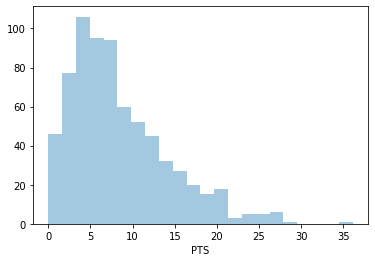

In [22]:
sns.distplot(df.PTS, 
             kde=False)


Change bar line color

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


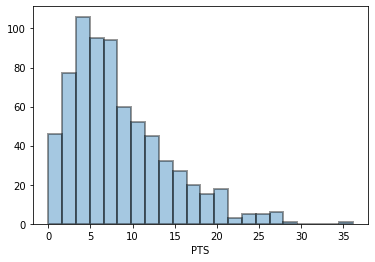

In [23]:
sns.distplot(df.PTS, 
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

Change bar fill colors

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


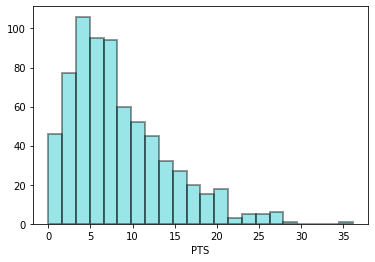

In [24]:
sns.distplot(df.PTS,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')

Making the histogram with Totals

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


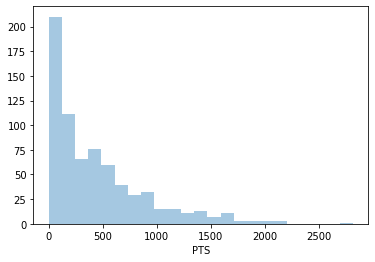

In [25]:
sns.distplot(df_t.PTS, 
             kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


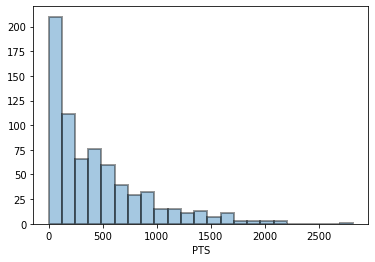

In [26]:
sns.distplot(df_t.PTS, 
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Points Total Season 2019')

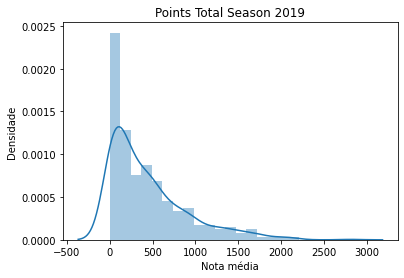

In [27]:
ax = sns.distplot(df_t.PTS)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Points Total Season 2019")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

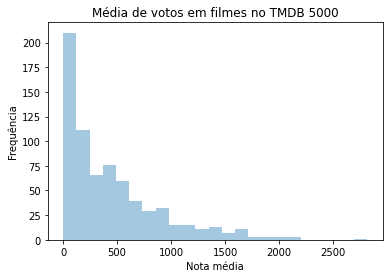

In [28]:
ax = sns.distplot(df_t.PTS, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, '2019 Season Total Points per Player')

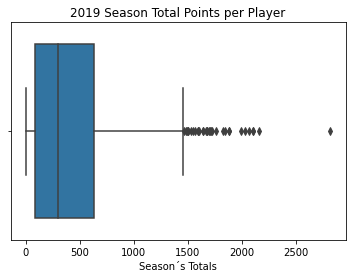

In [29]:
df_t['PTS'] = df_t['PTS'].astype(int)

ax = sns.boxplot(x=df_t.PTS)
ax.set(xlabel="Season´s Totals")
ax.set_title("2019 Season Total Points per Player")

In [30]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      708 non-null    object
 1   Player  708 non-null    object
 2   Pos     708 non-null    object
 3   Age     708 non-null    object
 4   Tm      708 non-null    object
 5   G       708 non-null    object
 6   GS      708 non-null    object
 7   MP      708 non-null    object
 8   FG      708 non-null    object
 9   FGA     708 non-null    object
 10  FG%     702 non-null    object
 11  3P      708 non-null    object
 12  3PA     708 non-null    object
 13  3P%     661 non-null    object
 14  2P      708 non-null    object
 15  2PA     708 non-null    object
 16  2P%     693 non-null    object
 17  eFG%    702 non-null    object
 18  FT      708 non-null    object
 19  FTA     708 non-null    object
 20  FT%     665 non-null    object
 21  ORB     708 non-null    object
 22  DRB     708 non-null    ob

In [31]:
TotalPoints_lessthan1500 = df_t.query("PTS <= 1500")
TotalPoints_lessthan1500.describe()

,PTS
count,680.000000
mean,385.144118
std,365.567152
min,0.000000
25%,79.750000
50%,279.000000
75%,571.250000
max,1498.000000


In [32]:
TotalPoints_lessthan1500.shape

(680, 30)

Text(0.5, 1.0, '2019 Season Total Points per Player')

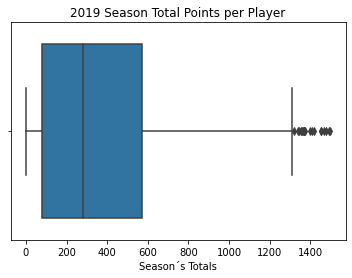

In [33]:
ax = sns.boxplot(x=TotalPoints_lessthan1500.PTS)
ax.set(xlabel="Season´s Totals")
ax.set_title("2019 Season Total Points per Player")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

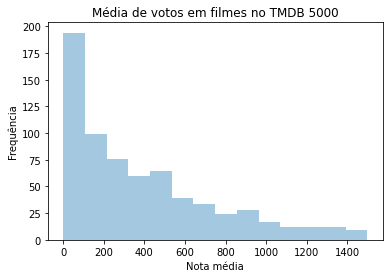

In [34]:
ax = sns.distplot(TotalPoints_lessthan1500.PTS, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")

In [43]:
TotalPoints_lessthan1500_Out0 = TotalPoints_lessthan1500.drop(TotalPoints_lessthan1500[TotalPoints_lessthan1500.PTS == 0].index)

TotalPoints_lessthan1500_Out0

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,588,56,157,.357,41,127,.323,15,30,.500,.487,12,13,.923,5,43,48,20,17,6,14,53,165
1,2,Quincy Acy,PF,28,PHO,10,0,123,4,18,.222,2,15,.133,2,3,.667,.278,7,10,.700,3,22,25,8,1,4,4,24,17
2,3,Jaylen Adams,PG,22,ATL,34,1,428,38,110,.345,25,74,.338,13,36,.361,.459,7,9,.778,11,49,60,65,14,5,28,45,108
3,4,Steven Adams,C,25,OKC,80,80,2669,481,809,.595,0,2,.000,481,807,.596,.595,146,292,.500,391,369,760,124,117,76,135,204,1108
4,5,Bam Adebayo,C,21,MIA,82,28,1913,280,486,.576,3,15,.200,277,471,.588,.579,166,226,.735,165,432,597,184,71,65,121,203,729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,82,16,28,.571,0,0,NaN,16,28,.571,.571,14,18,.778,9,9,18,3,1,3,4,16,46
730,529,Ante Žižić,C,22,CLE,59,25,1082,183,331,.553,0,0,NaN,183,331,.553,.553,93,132,.705,108,212,320,53,13,22,61,113,459
731,530,Ivica Zubac,C,21,TOT,59,37,1040,212,379,.559,0,0,NaN,212,379,.559,.559,101,126,.802,115,247,362,63,14,51,70,137,525
732,530,Ivica Zubac,C,21,LAL,33,12,516,112,193,.580,0,0,NaN,112,193,.580,.580,57,66,.864,54,108,162,25,4,27,33,73,281


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

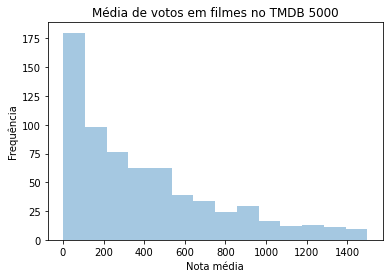

In [45]:
ax = sns.distplot(TotalPoints_lessthan1500_Out0.PTS, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")